# Introduction:
Intro text
1. Ausgangssituaion
2. Was werden wir alles machen?
3. Inhaltsverzeichnis

# 0. General Settings

Import of ....

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.ticker as mpl
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 100)

# 1. Importing Next Bike Data for Frankfurt and Berlin

In the following section we will look at the frankfurt and berlin datasets for next bike usage data. This will include looking at each datasets and cleaning them.

In [3]:
berlin_set = pd.read_csv("berlin_final.csv")
frankfurt_set = pd.read_csv("frankfurt_final.csv")
frankfurt_weather = pd.read_csv("frankfurt_weather_final.csv")
berlin_weather = pd.read_csv("berlin_weather_final.csv")

## 1.1 Frankfurt Set

In [4]:
frankfurt_set.head(100)

,Unnamed: 0,day,year,month,date,hour,min,weekday,weekday_str,b_number,city,trip_duration,distance,orig_lat,orig_lng,dest_lat,dest_lng
0,0,2019-06-25 21:51:00,2019,6,25,21,51,2,Tuesday,11420,frankfurt,7,0.715,49.991072,8.412515,49.984942,8.409474
1,1,2019-06-26 06:33:00,2019,6,26,6,33,3,Wednesday,11420,frankfurt,14,1.087,49.984942,8.409474,49.985673,8.424641
2,2,2019-06-27 13:20:00,2019,6,27,13,20,4,Thursday,11420,frankfurt,7,0.010,49.985613,8.424448,49.985538,8.424533
3,3,2019-06-27 13:30:00,2019,6,27,13,30,4,Thursday,11420,frankfurt,4,0.018,49.985528,8.424512,49.985679,8.424603
4,4,2019-06-27 13:59:00,2019,6,27,13,59,4,Thursday,11420,frankfurt,9,0.005,49.985679,8.424603,49.985636,8.424570
5,5,2019-06-27 14:49:00,2019,6,27,14,49,4,Thursday,11420,frankfurt,21,1.053,49.985661,8.424644,49.991004,8.412477
6,6,2019-06-28 06:08:00,2019,6,28,6,8,5,Friday,11420,frankfurt,12,1.030,49.990980,8.412610,49.985600,8.424339
7,7,2019-06-28 10:08:00,2019,6,28,10,8,5,Friday,11420,frankfurt,19,1.050,49.985574,8.424403,49.991130,8.412532
8,8,2019-05-30 15:42:00,2019,5,30,15,42,4,Thursday,11451,frankfurt,100,0.072,50.101748,8.553437,50.101711,8.554450
9,9,2019-05-31 02:22:00,2019,5,31,2,22,5,Friday,11451,frankfurt,10,1.483,50.101711,8.554450,50.114979,8.556589


### 1.1.1 Adding Weekdays for Frankfurt

** The split method for timestamp will not working later, if use this function first for weekdays. maybe use it later

from datetime import date
import calendar
frankfurt_set.day = pd.to_datetime(frankfurt_set.day)

for ind, row in frankfurt_set.iterrows():
    frankfurt_set.loc[ind, "Weekday"] = calendar.day_name[row['day'].weekday()]

### 1.1.2 Calculating the distance between the locations for Frankfurt

from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

  # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

for ind, row in frankfurt_set.iterrows():
    frankfurt_set.loc[ind, "distance"] = haversine(row['orig_lng'], row['orig_lat'], row['dest_lng'], row['dest_lat'])

### 1.1.3 Show Dataset of Frankfurt

In [5]:
print(frankfurt_set)

       Unnamed: 0                  day  year  month  date  hour  min  weekday  \
0               0  2019-06-25 21:51:00  2019      6    25    21   51        2   
1               1  2019-06-26 06:33:00  2019      6    26     6   33        3   
2               2  2019-06-27 13:20:00  2019      6    27    13   20        4   
3               3  2019-06-27 13:30:00  2019      6    27    13   30        4   
4               4  2019-06-27 13:59:00  2019      6    27    13   59        4   
...           ...                  ...   ...    ...   ...   ...  ...      ...   
20057       20057  2019-05-07 09:36:00  2019      5     7     9   36        2   
20058       20058  2019-05-07 12:00:00  2019      5     7    12    0        2   
20059       20059  2019-05-07 14:04:00  2019      5     7    14    4        2   
20060       20060  2019-05-07 19:54:00  2019      5     7    19   54        2   
20061       20061  2019-05-08 04:17:00  2019      5     8     4   17        3   

      weekday_str  b_number

In [6]:
frankfurt_set.head(100)

,Unnamed: 0,day,year,month,date,hour,min,weekday,weekday_str,b_number,city,trip_duration,distance,orig_lat,orig_lng,dest_lat,dest_lng
0,0,2019-06-25 21:51:00,2019,6,25,21,51,2,Tuesday,11420,frankfurt,7,0.715,49.991072,8.412515,49.984942,8.409474
1,1,2019-06-26 06:33:00,2019,6,26,6,33,3,Wednesday,11420,frankfurt,14,1.087,49.984942,8.409474,49.985673,8.424641
2,2,2019-06-27 13:20:00,2019,6,27,13,20,4,Thursday,11420,frankfurt,7,0.010,49.985613,8.424448,49.985538,8.424533
3,3,2019-06-27 13:30:00,2019,6,27,13,30,4,Thursday,11420,frankfurt,4,0.018,49.985528,8.424512,49.985679,8.424603
4,4,2019-06-27 13:59:00,2019,6,27,13,59,4,Thursday,11420,frankfurt,9,0.005,49.985679,8.424603,49.985636,8.424570
5,5,2019-06-27 14:49:00,2019,6,27,14,49,4,Thursday,11420,frankfurt,21,1.053,49.985661,8.424644,49.991004,8.412477
6,6,2019-06-28 06:08:00,2019,6,28,6,8,5,Friday,11420,frankfurt,12,1.030,49.990980,8.412610,49.985600,8.424339
7,7,2019-06-28 10:08:00,2019,6,28,10,8,5,Friday,11420,frankfurt,19,1.050,49.985574,8.424403,49.991130,8.412532
8,8,2019-05-30 15:42:00,2019,5,30,15,42,4,Thursday,11451,frankfurt,100,0.072,50.101748,8.553437,50.101711,8.554450
9,9,2019-05-31 02:22:00,2019,5,31,2,22,5,Friday,11451,frankfurt,10,1.483,50.101711,8.554450,50.114979,8.556589


In [7]:
frankfurt_set.tail(100)

,Unnamed: 0,day,year,month,date,hour,min,weekday,weekday_str,b_number,city,trip_duration,distance,orig_lat,orig_lng,dest_lat,dest_lng
19962,19962,2019-06-05 21:05:00,2019,6,5,21,5,3,Wednesday,38996,frankfurt,16,2.257,50.114397,8.675563,50.112704,8.707100
19963,19963,2019-06-17 15:12:00,2019,6,17,15,12,1,Monday,38996,frankfurt,6,0.068,50.129513,8.692637,50.128915,8.692439
19964,19964,2019-06-18 09:44:00,2019,6,18,9,44,2,Tuesday,38996,frankfurt,11,1.985,50.128915,8.692439,50.135930,8.666824
19965,19965,2019-06-21 12:26:00,2019,6,21,12,26,5,Friday,38996,frankfurt,59,3.901,50.101643,8.628361,50.109113,8.681801
19966,19966,2019-06-21 17:20:00,2019,6,21,17,20,5,Friday,38996,frankfurt,11,0.501,50.109113,8.681801,50.113124,8.678609
19967,19967,2019-06-21 17:40:00,2019,6,21,17,40,5,Friday,38996,frankfurt,25,4.436,50.113124,8.678609,50.130287,8.622433
19968,19968,2019-06-22 08:35:00,2019,6,22,8,35,6,Saturday,38996,frankfurt,30,4.200,50.130287,8.622433,50.124277,8.680599
19969,19969,2019-06-22 09:30:00,2019,6,22,9,30,6,Saturday,38996,frankfurt,32,1.188,50.124274,8.680602,50.114305,8.686588
19970,19970,2019-06-23 01:17:00,2019,6,23,1,17,7,Sunday,38996,frankfurt,33,0.104,50.114305,8.686588,50.115009,8.687546
19971,19971,2019-06-24 20:44:00,2019,6,24,20,44,1,Monday,38996,frankfurt,8,0.818,50.107110,8.689225,50.101915,8.681114


### 1.1.4 Dropping not necessary rows of Frankfurt

In [8]:
# Cleaning the dataset from rows with value "NaN"
frankfurt = frankfurt_set.dropna(axis=0)

In [9]:
frankfurt

,Unnamed: 0,day,year,month,date,hour,min,weekday,weekday_str,b_number,city,trip_duration,distance,orig_lat,orig_lng,dest_lat,dest_lng
0,0,2019-06-25 21:51:00,2019,6,25,21,51,2,Tuesday,11420,frankfurt,7,0.715,49.991072,8.412515,49.984942,8.409474
1,1,2019-06-26 06:33:00,2019,6,26,6,33,3,Wednesday,11420,frankfurt,14,1.087,49.984942,8.409474,49.985673,8.424641
2,2,2019-06-27 13:20:00,2019,6,27,13,20,4,Thursday,11420,frankfurt,7,0.010,49.985613,8.424448,49.985538,8.424533
3,3,2019-06-27 13:30:00,2019,6,27,13,30,4,Thursday,11420,frankfurt,4,0.018,49.985528,8.424512,49.985679,8.424603
4,4,2019-06-27 13:59:00,2019,6,27,13,59,4,Thursday,11420,frankfurt,9,0.005,49.985679,8.424603,49.985636,8.424570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20057,20057,2019-05-07 09:36:00,2019,5,7,9,36,2,Tuesday,91229,frankfurt,132,0.774,50.585947,8.683895,50.583418,8.673678
20058,20058,2019-05-07 12:00:00,2019,5,7,12,0,2,Tuesday,91229,frankfurt,11,2.172,50.583418,8.673678,50.573378,8.700063
20059,20059,2019-05-07 14:04:00,2019,5,7,14,4,2,Tuesday,91229,frankfurt,16,2.645,50.572982,8.700078,50.580484,8.664531
20060,20060,2019-05-07 19:54:00,2019,5,7,19,54,2,Tuesday,91229,frankfurt,10,1.105,50.580916,8.664705,50.582658,8.680114


## 1.2 Berlin Set

berlin_set.head(10)

### 1.2.1 Adding Weekdays for Berlin

** The split method for timestamp will not working later, if use this function first for weekdays. maybe use it later

berlin_set.day = pd.to_datetime(berlin_set.day)

for ind, row in berlin_set.iterrows():
    berlin_set.loc[ind, "Weekday"] = calendar.day_name[row['day'].weekday()]

### 1.2.2 Distance between the locations in Berlin

for ind, row in berlin_set.iterrows():
    berlin_set.loc[ind, "distance"] = haversine(row['orig_lng'], row['orig_lat'], row['dest_lng'], row['dest_lat'])

### 1.2.3 Show Dataset of Berlin

berlin_set.head(10)

berlin_set.tail(10)

### 1.2.4 Dropping not necessary rows of Berlin

# Cleaning the dataset from rows with value "NaN"
berlin = berlin_set.dropna(axis=0)

berlin

# 2. Weather data

The imported weather data are from the CDC weather database. We imported the following data for berlin and frankfurt from the 02/01/2019 to the 06/30/2019:
    1. windspeed
    2. precipation
    3. temperature

The **goal** for chapter 2. is to clean the weather data and merge them together into one table.
First, we will go through each dataset in chapter 2.1, 2.2, and 2.3. There we will clean the data and make them able to work with.
Second, we will merge the datasets together.


In [10]:
weather_windspeed = pd.read_csv("data_FF_MN008.csv") #Stündliche Stationsmessungen der Windgeschwindigkeit in 10 m Höhe in m/s 
weather_precipitation = pd.read_csv("data_R1_MN008.csv") #Stündliche Stationsmessungen der Niederschlagshöhe in mm für Deutschland
weather_temperature = pd.read_csv("data_TT_TU_MN009.csv") #Stündliche Stationsmessungen der Lufttemperatur auf 2 m Höhe in °C

## 2.1 cleaning windspeed data

In [11]:
weather_windspeed.head()

,Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Byte,Qualitaet_Niveau
0,FF_MN008,1420,201902010000,2.5,3,0
1,FF_MN008,1420,201902010100,2.4,3,0
2,FF_MN008,1420,201902010200,1.7,3,0
3,FF_MN008,1420,201902010300,1.6,3,0
4,FF_MN008,1420,201902010400,2.1,3,0


In [12]:
# Renaming column names
weather_windspeed.rename(columns = {"Wert": "Windspeed in m/s"},inplace = True) 

In [13]:
# Set timestamp         
for ind, row in weather_windspeed.iterrows():
    weather_windspeed.loc[ind, "Zeitstempel"] = pd.to_datetime(row['Zeitstempel'], format='%Y%m%d%H%M')

In [14]:
# Change the PID from CDC data to readable data
for ind, row in weather_windspeed.iterrows():
    if weather_windspeed.loc[ind, "SDO_ID"] == 1420:
        weather_windspeed.loc[ind, "SDO_ID"] = "Frankfurt"
    elif weather_windspeed.loc[ind, "SDO_ID"] == 433:
        weather_windspeed.loc[ind, "SDO_ID"] = "Berlin"
    else: 
        weather_windspeed.loc[ind, "SDO_ID"] = ""

In [15]:
# Drop not necessary columns
cleaned_weather_windspeed = weather_windspeed.drop(["Qualitaet_Byte", "Qualitaet_Niveau", "Produkt_Code"], axis=1)

In [16]:
cleaned_weather_windspeed

,SDO_ID,Zeitstempel,Windspeed in m/s
0,Frankfurt,2019-02-01 00:00:00,2.5
1,Frankfurt,2019-02-01 01:00:00,2.4
2,Frankfurt,2019-02-01 02:00:00,1.7
3,Frankfurt,2019-02-01 03:00:00,1.6
4,Frankfurt,2019-02-01 04:00:00,2.1
...,...,...,...
7176,Berlin,2019-06-30 19:00:00,2.6
7177,Berlin,2019-06-30 20:00:00,6.6
7178,Berlin,2019-06-30 21:00:00,7.8
7179,Berlin,2019-06-30 22:00:00,6.5


## 2.2 cleaning precipation data (Niederschlagshöhe)

In [17]:
weather_precipitation.head()

,Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Byte,Qualitaet_Niveau
0,R1_MN008,1420,201902010000,0.0,3,0
1,R1_MN008,1420,201902010100,0.0,3,0
2,R1_MN008,1420,201902010200,0.2,3,0
3,R1_MN008,1420,201902010300,0.7,3,0
4,R1_MN008,1420,201902010400,0.0,3,0


In [18]:
# Renaming column names
weather_precipitation.rename(columns = {"Wert": "Precipation in mm"},inplace = True) 

In [19]:
# Set timestamp         
for ind, row in weather_precipitation.iterrows():
    weather_precipitation.loc[ind, "Zeitstempel"] = pd.to_datetime(row['Zeitstempel'], format='%Y%m%d%H%M')

In [20]:
# Change the PID from CDC data to readable data
for ind, row in weather_precipitation.iterrows():
    if weather_precipitation.loc[ind, "SDO_ID"] == 1420:
        weather_precipitation.loc[ind, "SDO_ID"] = "Frankfurt"
    elif weather_precipitation.loc[ind, "SDO_ID"] == 433:
        weather_precipitation.loc[ind, "SDO_ID"] = "Berlin"
    else: 
        weather_precipitation.loc[ind, "SDO_ID"] = ""

In [21]:
# Drop not necessary columns
cleaned_weather_precipitation = weather_precipitation.drop(["Qualitaet_Byte", "Qualitaet_Niveau", "Produkt_Code"], axis=1)

In [22]:
cleaned_weather_precipitation

,SDO_ID,Zeitstempel,Precipation in mm
0,Frankfurt,2019-02-01 00:00:00,0.0
1,Frankfurt,2019-02-01 01:00:00,0.0
2,Frankfurt,2019-02-01 02:00:00,0.2
3,Frankfurt,2019-02-01 03:00:00,0.7
4,Frankfurt,2019-02-01 04:00:00,0.0
...,...,...,...
7173,Berlin,2019-06-30 19:00:00,0.0
7174,Berlin,2019-06-30 20:00:00,0.0
7175,Berlin,2019-06-30 21:00:00,0.0
7176,Berlin,2019-06-30 22:00:00,0.0


## 2.3 cleaning temperature data

In [23]:
weather_temperature.head()

,Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Byte,Qualitaet_Niveau
0,TT_TU_MN009,1420,201902010000,-0.3,7,6
1,TT_TU_MN009,1420,201902010100,-0.1,7,6
2,TT_TU_MN009,1420,201902010200,-0.3,7,1
3,TT_TU_MN009,1420,201902010300,-0.3,7,1
4,TT_TU_MN009,1420,201902010400,0.0,7,1


In [24]:
# Renaming column names
weather_temperature.rename(columns = {"Wert": "Temperature"},inplace = True) 

In [25]:
# Set timestamp         
for ind, row in weather_temperature.iterrows():
    weather_temperature.loc[ind, "Zeitstempel"] = pd.to_datetime(row['Zeitstempel'], format='%Y%m%d%H%M')

In [26]:
# Change the PID from CDC data to readable data
for ind, row in weather_temperature.iterrows():
    if weather_temperature.loc[ind, "SDO_ID"] == 1420:
        weather_temperature.loc[ind, "SDO_ID"] = "Frankfurt"
    elif weather_temperature.loc[ind, "SDO_ID"] == 433:
        weather_temperature.loc[ind, "SDO_ID"] = "Berlin"
    else: 
        weather_temperature.loc[ind, "SDO_ID"] = ""

In [27]:
# Drop not necessary columns
cleaned_weather_temperature = weather_temperature.drop(["Qualitaet_Byte", "Qualitaet_Niveau", "Produkt_Code"], axis=1)

In [28]:
cleaned_weather_temperature

,SDO_ID,Zeitstempel,Temperature
0,Frankfurt,2019-02-01 00:00:00,-0.3
1,Frankfurt,2019-02-01 01:00:00,-0.1
2,Frankfurt,2019-02-01 02:00:00,-0.3
3,Frankfurt,2019-02-01 03:00:00,-0.3
4,Frankfurt,2019-02-01 04:00:00,0.0
...,...,...,...
7195,Berlin,2019-06-30 19:00:00,34.1
7196,Berlin,2019-06-30 20:00:00,30.1
7197,Berlin,2019-06-30 21:00:00,27.8
7198,Berlin,2019-06-30 22:00:00,25.8


## 2.4 merging the datasets to one final table

In [29]:
# Merging the tables windspeed and preciption
weather_set1 = pd.merge(cleaned_weather_windspeed, cleaned_weather_precipitation,  on=('Zeitstempel', 'SDO_ID'), how='outer')

In [30]:
# Result of that firt merge:
weather_set1

,SDO_ID,Zeitstempel,Windspeed in m/s,Precipation in mm
0,Frankfurt,2019-02-01 00:00:00,2.5,0.0
1,Frankfurt,2019-02-01 01:00:00,2.4,0.0
2,Frankfurt,2019-02-01 02:00:00,1.7,0.2
3,Frankfurt,2019-02-01 03:00:00,1.6,0.7
4,Frankfurt,2019-02-01 04:00:00,2.1,0.0
...,...,...,...,...
7176,Berlin,2019-06-30 19:00:00,2.6,0.0
7177,Berlin,2019-06-30 20:00:00,6.6,0.0
7178,Berlin,2019-06-30 21:00:00,7.8,0.0
7179,Berlin,2019-06-30 22:00:00,6.5,0.0


In [31]:
# Merging the table windspeed and preciption with the temerature dataset
weather_set2 = pd.merge(weather_set1, cleaned_weather_temperature,  on=('Zeitstempel', 'SDO_ID'), how='outer')

In [32]:
# Result of that second merge:
weather_set2

,SDO_ID,Zeitstempel,Windspeed in m/s,Precipation in mm,Temperature
0,Frankfurt,2019-02-01 00:00:00,2.5,0.0,-0.3
1,Frankfurt,2019-02-01 01:00:00,2.4,0.0,-0.1
2,Frankfurt,2019-02-01 02:00:00,1.7,0.2,-0.3
3,Frankfurt,2019-02-01 03:00:00,1.6,0.7,-0.3
4,Frankfurt,2019-02-01 04:00:00,2.1,0.0,0.0
...,...,...,...,...,...
7195,Berlin,2019-06-13 08:00:00,NaN,NaN,17.6
7196,Berlin,2019-06-13 09:00:00,NaN,NaN,18.9
7197,Berlin,2019-06-13 10:00:00,NaN,NaN,20.0
7198,Berlin,2019-06-13 11:00:00,NaN,NaN,21.6


In [33]:
# Cleaning the merged dataset, because we have rows with NaN
weather = weather_set2.dropna(axis=0)

In [34]:
# Result of our cleaned and merged weather data for berlin and frankfurt from 02/2019 to 06/2019
weather

,SDO_ID,Zeitstempel,Windspeed in m/s,Precipation in mm,Temperature
0,Frankfurt,2019-02-01 00:00:00,2.5,0.0,-0.3
1,Frankfurt,2019-02-01 01:00:00,2.4,0.0,-0.1
2,Frankfurt,2019-02-01 02:00:00,1.7,0.2,-0.3
3,Frankfurt,2019-02-01 03:00:00,1.6,0.7,-0.3
4,Frankfurt,2019-02-01 04:00:00,2.1,0.0,0.0
...,...,...,...,...,...
7176,Berlin,2019-06-30 19:00:00,2.6,0.0,34.1
7177,Berlin,2019-06-30 20:00:00,6.6,0.0,30.1
7178,Berlin,2019-06-30 21:00:00,7.8,0.0,27.8
7179,Berlin,2019-06-30 22:00:00,6.5,0.0,25.8


# 3. Matching Weather Wata to the Next Bike Data

## 3.1 Frankfurt Set

In [35]:
# get info about frankfurt sets column "day"
frankfurt_set["day"]

0        2019-06-25 21:51:00
1        2019-06-26 06:33:00
2        2019-06-27 13:20:00
3        2019-06-27 13:30:00
4        2019-06-27 13:59:00
                ...         
20057    2019-05-07 09:36:00
20058    2019-05-07 12:00:00
20059    2019-05-07 14:04:00
20060    2019-05-07 19:54:00
20061    2019-05-08 04:17:00
Name: day, Length: 20062, dtype: object

In [36]:
# get info about frankfurt sets column "time"
frankfurt_set['hour'] = pd.to_numeric(frankfurt_set['hour'])

In [37]:
type(frankfurt_set['day'])

pandas.core.series.Series

In [38]:
type(frankfurt_set['hour'])

pandas.core.series.Series

In [39]:
# Matching the temperature data to the frankfurt set
for ind, row in frankfurt_set.iterrows():
    date = frankfurt_set.loc[ind, "day"].split("-")
    year = int(date[0])
    month = int(date[1])
    day = date[2]
    time = day.split(" ")
    daydate = int(time[0])
    #hour = int(frankfurt.loc[ind, "time"].split(":")[0])
    hour = time[1].split(":")[0]
    hour1 = int(hour)
    frankfurt_set.loc[ind, "Zeitstempel"] = pd.Timestamp(year, month, daydate, hour1)

In [40]:
type(frankfurt_set['Zeitstempel'])

pandas.core.series.Series

In [41]:
frankfurt_set

,Unnamed: 0,day,year,month,date,hour,min,weekday,weekday_str,b_number,city,trip_duration,distance,orig_lat,orig_lng,dest_lat,dest_lng,Zeitstempel
0,0,2019-06-25 21:51:00,2019,6,25,21,51,2,Tuesday,11420,frankfurt,7,0.715,49.991072,8.412515,49.984942,8.409474,2019-06-25 21:00:00
1,1,2019-06-26 06:33:00,2019,6,26,6,33,3,Wednesday,11420,frankfurt,14,1.087,49.984942,8.409474,49.985673,8.424641,2019-06-26 06:00:00
2,2,2019-06-27 13:20:00,2019,6,27,13,20,4,Thursday,11420,frankfurt,7,0.010,49.985613,8.424448,49.985538,8.424533,2019-06-27 13:00:00
3,3,2019-06-27 13:30:00,2019,6,27,13,30,4,Thursday,11420,frankfurt,4,0.018,49.985528,8.424512,49.985679,8.424603,2019-06-27 13:00:00
4,4,2019-06-27 13:59:00,2019,6,27,13,59,4,Thursday,11420,frankfurt,9,0.005,49.985679,8.424603,49.985636,8.424570,2019-06-27 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20057,20057,2019-05-07 09:36:00,2019,5,7,9,36,2,Tuesday,91229,frankfurt,132,0.774,50.585947,8.683895,50.583418,8.673678,2019-05-07 09:00:00
20058,20058,2019-05-07 12:00:00,2019,5,7,12,0,2,Tuesday,91229,frankfurt,11,2.172,50.583418,8.673678,50.573378,8.700063,2019-05-07 12:00:00
20059,20059,2019-05-07 14:04:00,2019,5,7,14,4,2,Tuesday,91229,frankfurt,16,2.645,50.572982,8.700078,50.580484,8.664531,2019-05-07 14:00:00
20060,20060,2019-05-07 19:54:00,2019,5,7,19,54,2,Tuesday,91229,frankfurt,10,1.105,50.580916,8.664705,50.582658,8.680114,2019-05-07 19:00:00


### 3.1.1 Checking if the data is matched right

In [42]:
weather

,SDO_ID,Zeitstempel,Windspeed in m/s,Precipation in mm,Temperature
0,Frankfurt,2019-02-01 00:00:00,2.5,0.0,-0.3
1,Frankfurt,2019-02-01 01:00:00,2.4,0.0,-0.1
2,Frankfurt,2019-02-01 02:00:00,1.7,0.2,-0.3
3,Frankfurt,2019-02-01 03:00:00,1.6,0.7,-0.3
4,Frankfurt,2019-02-01 04:00:00,2.1,0.0,0.0
...,...,...,...,...,...
7176,Berlin,2019-06-30 19:00:00,2.6,0.0,34.1
7177,Berlin,2019-06-30 20:00:00,6.6,0.0,30.1
7178,Berlin,2019-06-30 21:00:00,7.8,0.0,27.8
7179,Berlin,2019-06-30 22:00:00,6.5,0.0,25.8


In [43]:
type(weather["Zeitstempel"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [44]:
weather["Zeitstempel"][1]

Timestamp('2019-02-01 01:00:00')

In [45]:
frankfurt_set['Zeitstempel']

0       2019-06-25 21:00:00
1       2019-06-26 06:00:00
2       2019-06-27 13:00:00
3       2019-06-27 13:00:00
4       2019-06-27 13:00:00
                ...        
20057   2019-05-07 09:00:00
20058   2019-05-07 12:00:00
20059   2019-05-07 14:00:00
20060   2019-05-07 19:00:00
20061   2019-05-08 04:00:00
Name: Zeitstempel, Length: 20062, dtype: datetime64[ns]

In [46]:
type(frankfurt_set['Zeitstempel'])

pandas.core.series.Series

In [47]:
weather["SDO_ID"][0]

'Frankfurt'

In [48]:
weather["Temperature"][3]

-0.3

In [49]:
weather[(weather["Zeitstempel"] == pd.Timestamp(2019, 2, 1, 4))]

,SDO_ID,Zeitstempel,Windspeed in m/s,Precipation in mm,Temperature
4,Frankfurt,2019-02-01 04:00:00,2.1,0.0,0.0
3604,Berlin,2019-02-01 04:00:00,3.3,0.0,-3.4


In [50]:
weather[(weather["SDO_ID"] == "Frankfurt")]

,SDO_ID,Zeitstempel,Windspeed in m/s,Precipation in mm,Temperature
0,Frankfurt,2019-02-01 00:00:00,2.5,0.0,-0.3
1,Frankfurt,2019-02-01 01:00:00,2.4,0.0,-0.1
2,Frankfurt,2019-02-01 02:00:00,1.7,0.2,-0.3
3,Frankfurt,2019-02-01 03:00:00,1.6,0.7,-0.3
4,Frankfurt,2019-02-01 04:00:00,2.1,0.0,0.0
...,...,...,...,...,...
3595,Frankfurt,2019-06-30 19:00:00,5.1,0.0,33.9
3596,Frankfurt,2019-06-30 20:00:00,7.4,0.0,31.4
3597,Frankfurt,2019-06-30 21:00:00,4.7,0.0,28.3
3598,Frankfurt,2019-06-30 22:00:00,5.4,0.0,26.8


In [51]:
def get_temperature(day):
    return weather[(weather["Zeitstempel"] == day) & (weather["SDO_ID"] == "Frankfurt")].iloc[0, 4]

In [52]:
print(get_temperature(frankfurt_set.loc[0, "Zeitstempel"]))

27.3


In [53]:
def get_wind(day):
    return weather[(weather["Zeitstempel"] == day) & (weather["SDO_ID"] == "Frankfurt")].iloc[0, 2]

In [54]:
def get_precipation(day):
    return weather[(weather["Zeitstempel"] == day) & (weather["SDO_ID"] == "Frankfurt")].iloc[0, 3]

In [55]:
frankfurt_set.loc[0, "Zeitstempel"]

Timestamp('2019-06-25 21:00:00')

In [56]:
frankfurt_set.columns

Index(['Unnamed: 0', 'day', 'year', 'month', 'date', 'hour', 'min', 'weekday',
       'weekday_str', 'b_number', 'city', 'trip_duration', 'distance',
       'orig_lat', 'orig_lng', 'dest_lat', 'dest_lng', 'Zeitstempel'],
      dtype='object')

### 3.1.2 Adding the Temperature Column to the Frankfurt Set

In [57]:
frankfurt_set

,Unnamed: 0,day,year,month,date,hour,min,weekday,weekday_str,b_number,city,trip_duration,distance,orig_lat,orig_lng,dest_lat,dest_lng,Zeitstempel
0,0,2019-06-25 21:51:00,2019,6,25,21,51,2,Tuesday,11420,frankfurt,7,0.715,49.991072,8.412515,49.984942,8.409474,2019-06-25 21:00:00
1,1,2019-06-26 06:33:00,2019,6,26,6,33,3,Wednesday,11420,frankfurt,14,1.087,49.984942,8.409474,49.985673,8.424641,2019-06-26 06:00:00
2,2,2019-06-27 13:20:00,2019,6,27,13,20,4,Thursday,11420,frankfurt,7,0.010,49.985613,8.424448,49.985538,8.424533,2019-06-27 13:00:00
3,3,2019-06-27 13:30:00,2019,6,27,13,30,4,Thursday,11420,frankfurt,4,0.018,49.985528,8.424512,49.985679,8.424603,2019-06-27 13:00:00
4,4,2019-06-27 13:59:00,2019,6,27,13,59,4,Thursday,11420,frankfurt,9,0.005,49.985679,8.424603,49.985636,8.424570,2019-06-27 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20057,20057,2019-05-07 09:36:00,2019,5,7,9,36,2,Tuesday,91229,frankfurt,132,0.774,50.585947,8.683895,50.583418,8.673678,2019-05-07 09:00:00
20058,20058,2019-05-07 12:00:00,2019,5,7,12,0,2,Tuesday,91229,frankfurt,11,2.172,50.583418,8.673678,50.573378,8.700063,2019-05-07 12:00:00
20059,20059,2019-05-07 14:04:00,2019,5,7,14,4,2,Tuesday,91229,frankfurt,16,2.645,50.572982,8.700078,50.580484,8.664531,2019-05-07 14:00:00
20060,20060,2019-05-07 19:54:00,2019,5,7,19,54,2,Tuesday,91229,frankfurt,10,1.105,50.580916,8.664705,50.582658,8.680114,2019-05-07 19:00:00


In [58]:
for ind, row in frankfurt_set.iterrows():
    frankfurt_set.loc[ind, "temperature"] = get_temperature(frankfurt_set.loc[ind, "Zeitstempel"])

In [59]:
# Adding weather wind for Frankfurt Set
for ind, row in frankfurt.iterrows():
    frankfurt_set.loc[ind, "windspeed"] = get_wind(frankfurt_set.loc[ind, "Zeitstempel"])

In [60]:
# Adding weather precipation for Frankfurt Set
for ind, row in frankfurt.iterrows():
    frankfurt_set.loc[ind, "precipation"] = get_precipation(frankfurt_set.loc[ind, "Zeitstempel"])

In [61]:
frankfurt_set.head(10)

,Unnamed: 0,day,year,month,date,hour,min,weekday,weekday_str,b_number,...,trip_duration,distance,orig_lat,orig_lng,dest_lat,dest_lng,Zeitstempel,temperature,windspeed,precipation
0,0,2019-06-25 21:51:00,2019,6,25,21,51,2,Tuesday,11420,...,7,0.715,49.991072,8.412515,49.984942,8.409474,2019-06-25 21:00:00,27.3,0.7,0.0
1,1,2019-06-26 06:33:00,2019,6,26,6,33,3,Wednesday,11420,...,14,1.087,49.984942,8.409474,49.985673,8.424641,2019-06-26 06:00:00,25.0,1.2,0.0
2,2,2019-06-27 13:20:00,2019,6,27,13,20,4,Thursday,11420,...,7,0.010,49.985613,8.424448,49.985538,8.424533,2019-06-27 13:00:00,30.6,5.6,0.0
3,3,2019-06-27 13:30:00,2019,6,27,13,30,4,Thursday,11420,...,4,0.018,49.985528,8.424512,49.985679,8.424603,2019-06-27 13:00:00,30.6,5.6,0.0
4,4,2019-06-27 13:59:00,2019,6,27,13,59,4,Thursday,11420,...,9,0.005,49.985679,8.424603,49.985636,8.424570,2019-06-27 13:00:00,30.6,5.6,0.0
5,5,2019-06-27 14:49:00,2019,6,27,14,49,4,Thursday,11420,...,21,1.053,49.985661,8.424644,49.991004,8.412477,2019-06-27 14:00:00,30.5,5.1,0.0
6,6,2019-06-28 06:08:00,2019,6,28,6,8,5,Friday,11420,...,12,1.030,49.990980,8.412610,49.985600,8.424339,2019-06-28 06:00:00,17.0,4.9,0.0
7,7,2019-06-28 10:08:00,2019,6,28,10,8,5,Friday,11420,...,19,1.050,49.985574,8.424403,49.991130,8.412532,2019-06-28 10:00:00,21.9,3.9,0.0
8,8,2019-05-30 15:42:00,2019,5,30,15,42,4,Thursday,11451,...,100,0.072,50.101748,8.553437,50.101711,8.554450,2019-05-30 15:00:00,20.0,4.9,0.0
9,9,2019-05-31 02:22:00,2019,5,31,2,22,5,Friday,11451,...,10,1.483,50.101711,8.554450,50.114979,8.556589,2019-05-31 02:00:00,14.3,1.7,0.0


## 3.2 Berlin Set

 # Matching the temperature data to the berlin set
for ind, row in berlin_set.iterrows():
    date = berlin_set.loc[ind, "day"].split("-")
    year = int(date[0])
    month = int(date[1])
    day = date[2]
    time = day.split(" ")
    daydate = int(time[0])
    #hour = int(berlin.loc[ind, "time"].split(":")[0])
    hour = time[1].split(":")[0]
    hour1 = int(hour)
    berlin_set.loc[ind, "Zeitstempel"] = pd.Timestamp(year, month, daydate, hour1)

berlin_set.head(10)

In [62]:
def get_temperatureBerlin(day):
    return weather[(weather["Zeitstempel"] == day) & (weather["SDO_ID"] == "Berlin")].iloc[0, 4]

In [63]:
def get_windBerlin(day):
    return weather[(weather["Zeitstempel"] == day) & (weather["SDO_ID"] == "Berlin")].iloc[0, 2]

In [64]:
def get_precipationBerlin(day):
    return weather[(weather["Zeitstempel"] == day) & (weather["SDO_ID"] == "Berlin")].iloc[0, 3]

print(get_temperatureBerlin(berlin_set.loc[0, "Zeitstempel"]))

print(get_windBerlin(berlin_set.loc[0, "Zeitstempel"]))

print(get_precipationBerlin(berlin_set.loc[0, "Zeitstempel"]))

berlin_set.columns

for ind, row in berlin_set.iterrows():
    berlin_set.loc[ind, "temperature"] = get_temperatureBerlin(berlin_set.loc[ind, "Zeitstempel"])

# Adding weather wind for Berlin Set
for ind, row in berlin_set.iterrows():
    berlin_set.loc[ind, "windspeed"] = get_windBerlin(berlin_set.loc[ind, "Zeitstempel"])

# Adding weather precipation for Berlin Set
for ind, row in berlin.iterrows():
    berlin.loc[ind, "precipation"] = get_precipationBerlin(berlin_set.loc[ind, "Zeitstempel"])

berlin_set.head(100)

### 4. Visualizing Datas of Frankfurt

In [65]:
data_weekday = pd.DataFrame()
data_weekday['time']= frankfurt_set.weekday
data_weekday['time'] = frankfurt_set.weekday.value_counts()
data_weekday.sort_index(inplace=True)

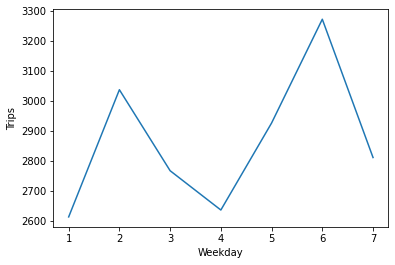

In [66]:
plt.plot(data_weekday.index, data_weekday['time'], label='Weekday Usage')
plt.ylabel('Trips')
plt.xlabel('Weekday')
plt.show()

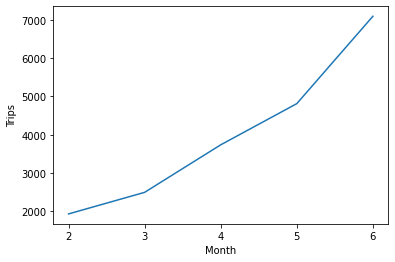

In [67]:
data_month = pd.DataFrame()
data_month['month'] = frankfurt_set.month.value_counts()
data_month.sort_index(inplace=True)
plt.plot(data_month.index, data_month.month, label='Trips in each Month')
plt.ylabel('Trips')
plt.xlabel('Month')
plt.gca().xaxis.set_major_locator(mpl.MultipleLocator(1))
plt.show()

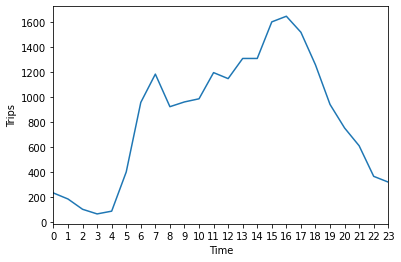

In [68]:
data_day = pd.DataFrame()
data_day['hour'] = frankfurt_set.hour.value_counts()
data_day.sort_index(inplace=True)
plt.plot(data_day.index, data_day.hour, label='Trips in each hour')
plt.ylabel('Trips')
plt.xlabel('Time')
plt.xlim(0, 23)
plt.gca().xaxis.set_major_locator(mpl.MultipleLocator(1))
plt.show()

In [69]:
frankfurt = frankfurt_set

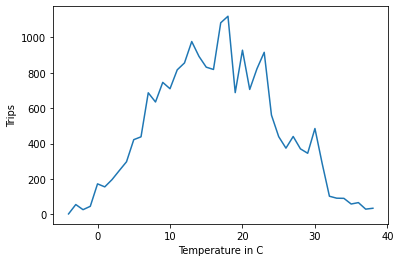

In [70]:
data_d = pd.DataFrame()
frankfurt.temperature = frankfurt.temperature.astype(int)
data_d['temp'] = frankfurt.temperature.value_counts()
data_d.sort_index(inplace=True)
plt.plot(data_d.index, data_d.temp, label='Trips fro each Temperature')
plt.ylabel('Trips')
plt.xlabel('Temperature in C')
plt.show()

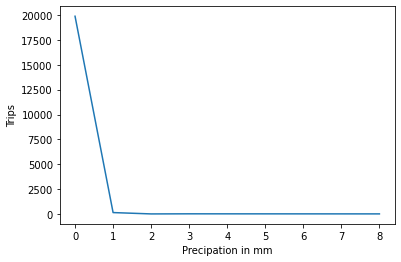

In [71]:
data_d = pd.DataFrame()
frankfurt.precipation = frankfurt.precipation.astype(int)
data_d['prec'] = frankfurt.precipation.value_counts()
data_d.sort_index(inplace=True)
plt.plot(data_d.index, data_d.prec, label='Trips fro each Precipation')
plt.ylabel('Trips')
plt.xlabel('Precipation in mm')
plt.savefig('trip_prec.png')
plt.show()

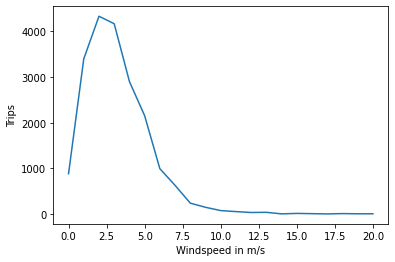

In [72]:
data_d = pd.DataFrame()
frankfurt.windspeed = frankfurt.windspeed.astype(int)
data_d['windspeed'] = frankfurt.windspeed.value_counts()
data_d.sort_index(inplace=True)
plt.plot(data_d.index, data_d.windspeed, label='Trips fro each Windspeed')
plt.ylabel('Trips')
plt.xlabel('Windspeed in m/s')
plt.show()

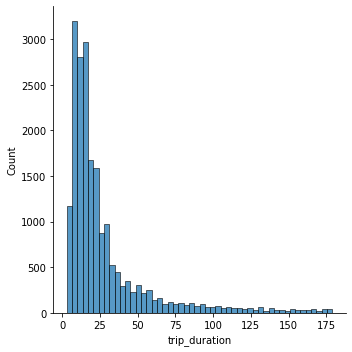

In [75]:
frankfurt["trip_duration"].describe()
sns.displot(frankfurt["trip_duration"], bins=50, kde=False)
plt.show()

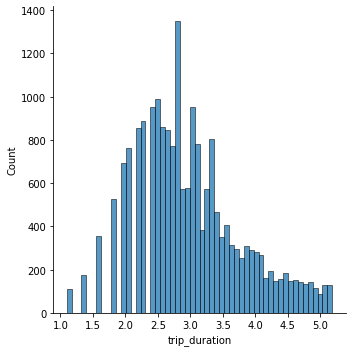

In [82]:
# after log transform 
sns.displot(frankfurt["trip_duration"].apply(np.log), kde=False)

D:\Softwares\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

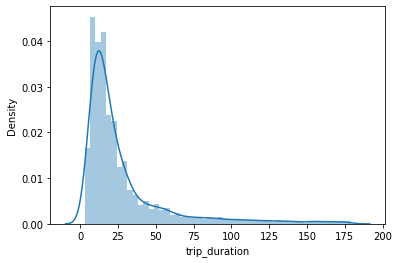

In [91]:
sns.distplot(frankfurt["trip_duration"])

D:\Softwares\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

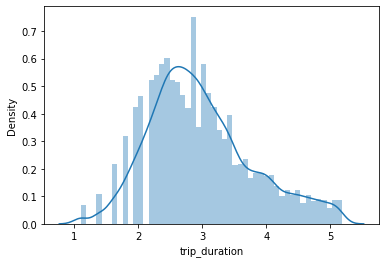

In [90]:
# use log transformation
sns.distplot(frankfurt["trip_duration"].apply(np.log))